In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize
import statsmodels.formula.api as smf
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm
from sklearn.metrics import mean_squared_error 

## 데이터 준비 단계

In [2]:
life_data = pd.read_csv('Life Expectancy Data.csv')
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [3]:
life_data.columns = ['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
                     'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
                     'Measles', 'BMI', 'Under5_Deaths', 'Polio', 'Total_Expenditure',
                     'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_10_19_Years', 'Thinness_5_9_years',
                     'Income_Composition_Of_Resources', 'Schooling']

life_data['Country']=life_data['Country'].astype('category')
life_data['Status']=life_data['Status'].astype('category')

life_data.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_10_19_Years,Thinness_5_9_years,Income_Composition_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          2938 non-null   category
 1   Year                             2938 non-null   int64   
 2   Status                           2938 non-null   category
 3   Life_Expectancy                  2928 non-null   float64 
 4   Adult_Mortality                  2928 non-null   float64 
 5   Infant_Deaths                    2938 non-null   int64   
 6   Alcohol                          2744 non-null   float64 
 7   Percentage_Expenditure           2938 non-null   float64 
 8   Hepatitis_B                      2385 non-null   float64 
 9   Measles                          2938 non-null   int64   
 10  BMI                              2904 non-null   float64 
 11  Under5_Deaths                    2938 non-null   int64   
 12  Polio 

## 전처리

### 결측치

In [5]:
life_data.describe().iloc[:, 1:]

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under5_Deaths,Polio,Total_Expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_10_19_Years,Thinness_5_9_years,Income_Composition_Of_Resources,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


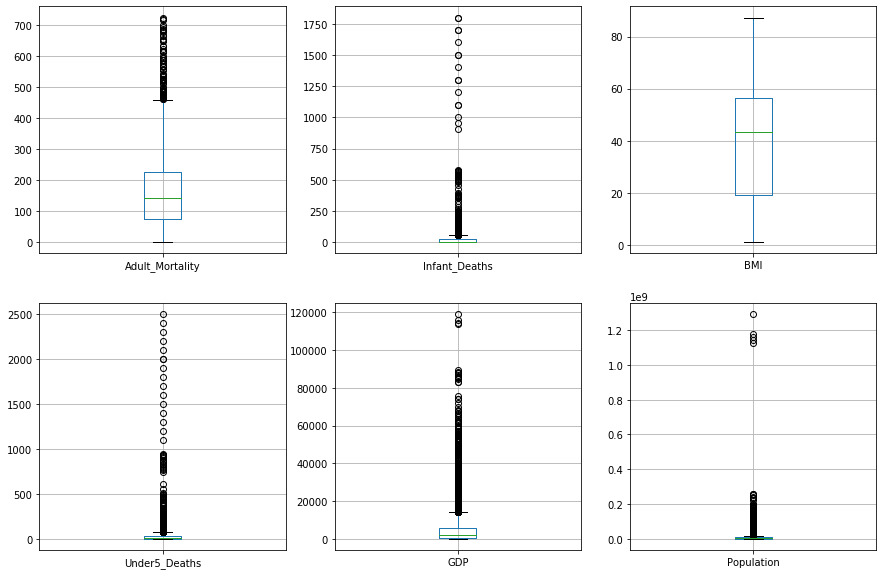

In [6]:
# 이상치 확인후, 이상치를 결측으로 처리한 뒤 결측값대체

plt.figure(figsize=(15,10))
for i, col in enumerate(['Adult_Mortality', 'Infant_Deaths', 'BMI', 'Under5_Deaths', 'GDP', 'Population'], start=1):
    plt.subplot(2, 3, i)
    life_data.boxplot(col)

In [7]:
mort_5_percentile = np.percentile(life_data.Adult_Mortality.dropna(), 5)
life_data.Adult_Mortality = life_data.apply(lambda x: np.nan if x.Adult_Mortality < mort_5_percentile else x.Adult_Mortality, axis=1)
life_data.Infant_Deaths = life_data.Infant_Deaths.replace(0, np.nan)
life_data.BMI = life_data.apply(lambda x: np.nan if (x.BMI < 10 or x.BMI > 50) else x.BMI, axis=1)
life_data['Under5_Deaths'] = life_data['Under5_Deaths'].replace(0, np.nan)

life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          2938 non-null   category
 1   Year                             2938 non-null   int64   
 2   Status                           2938 non-null   category
 3   Life_Expectancy                  2928 non-null   float64 
 4   Adult_Mortality                  2783 non-null   float64 
 5   Infant_Deaths                    2090 non-null   float64 
 6   Alcohol                          2744 non-null   float64 
 7   Percentage_Expenditure           2938 non-null   float64 
 8   Hepatitis_B                      2385 non-null   float64 
 9   Measles                          2938 non-null   int64   
 10  BMI                              1482 non-null   float64 
 11  Under5_Deaths                    2153 non-null   float64 
 12  Polio 

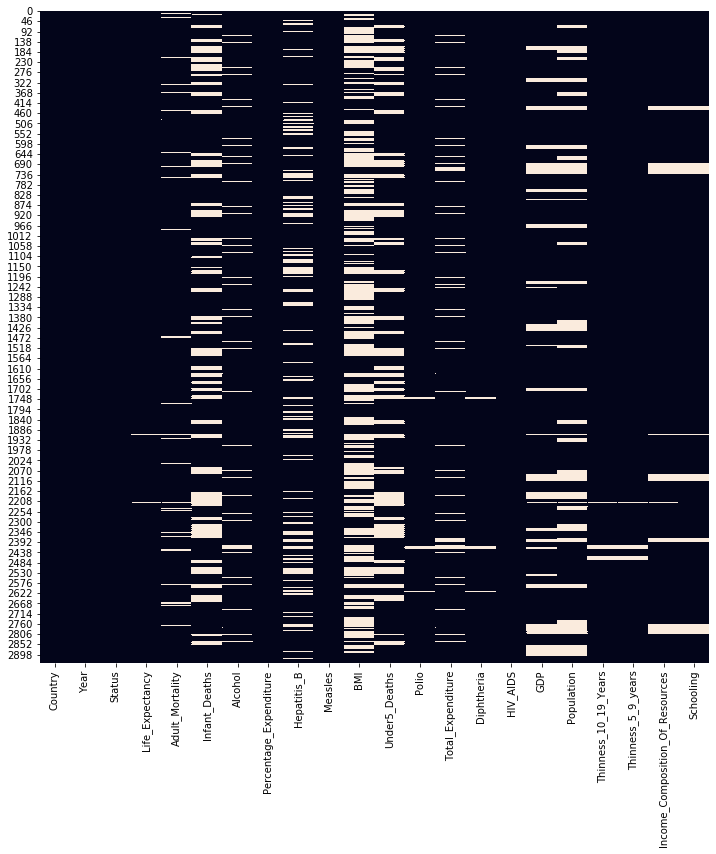

In [8]:
# 결측 분포 파악
plt.figure(figsize=(12,12))
sns.heatmap(life_data.isnull(),cbar=False)

In [9]:
# 각 열의 결측 개수와 비율 출력 함수

def null_column_percentage(df):
    df_cols = list(df.columns)
    cols_total_count = len(list(df.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = df[col].isnull().sum()
        total_count = df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))
    
null_column_percentage(life_data)

[iloc = 3] Life_Expectancy has 10 null values: 0.34% null
[iloc = 4] Adult_Mortality has 155 null values: 5.28% null
[iloc = 5] Infant_Deaths has 848 null values: 28.86% null
[iloc = 6] Alcohol has 194 null values: 6.6% null
[iloc = 8] Hepatitis_B has 553 null values: 18.82% null
[iloc = 10] BMI has 1456 null values: 49.56% null
[iloc = 11] Under5_Deaths has 785 null values: 26.72% null
[iloc = 12] Polio has 19 null values: 0.65% null
[iloc = 13] Total_Expenditure has 226 null values: 7.69% null
[iloc = 14] Diphtheria has 19 null values: 0.65% null
[iloc = 16] GDP has 448 null values: 15.25% null
[iloc = 17] Population has 652 null values: 22.19% null
[iloc = 18] Thinness_10_19_Years has 34 null values: 1.16% null
[iloc = 19] Thinness_5_9_years has 34 null values: 1.16% null
[iloc = 20] Income_Composition_Of_Resources has 167 null values: 5.68% null
[iloc = 21] Schooling has 163 null values: 5.55% null
Out of 22 total columns, 16 contain null values; 72.73% columns contain null values.

In [10]:
life_data.drop(columns='BMI', inplace=True)

In [11]:
# 연도별로 각 열의 중앙값으로 결측치 대체 함수(시계열 데이터 특성)

life_impute = []    # 결측치가 대체된 데이터를 저장하는 리스트

for Year in list(life_data.Year.unique()):
    year_data = life_data[life_data.Year == Year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().median()).copy()
    life_impute.append(year_data)
    
life_data = pd.concat(life_impute).copy()

In [12]:
null_column_percentage(life_data)

Out of 21 total columns, 0 contain null values; 0.0% columns contain null values.


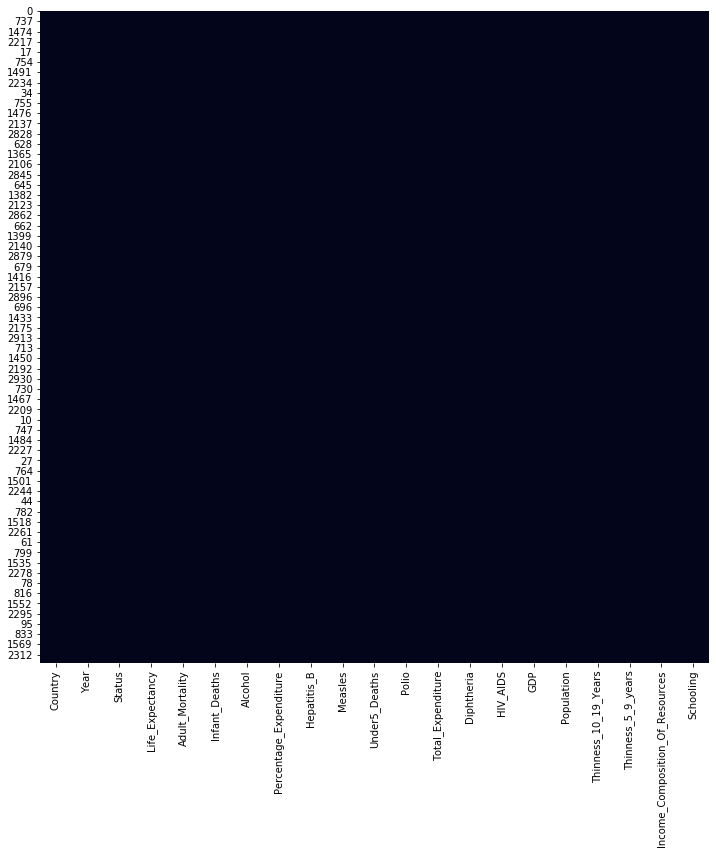

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(life_data.isnull(),cbar=False)

### 이상치

In [14]:
# 나라명, 연도, 국가 상태 변수는 제외 => 설명변수, 반응변수 역할을 할 수 있는 변수만 남김
var = list(life_data.columns)[3:]

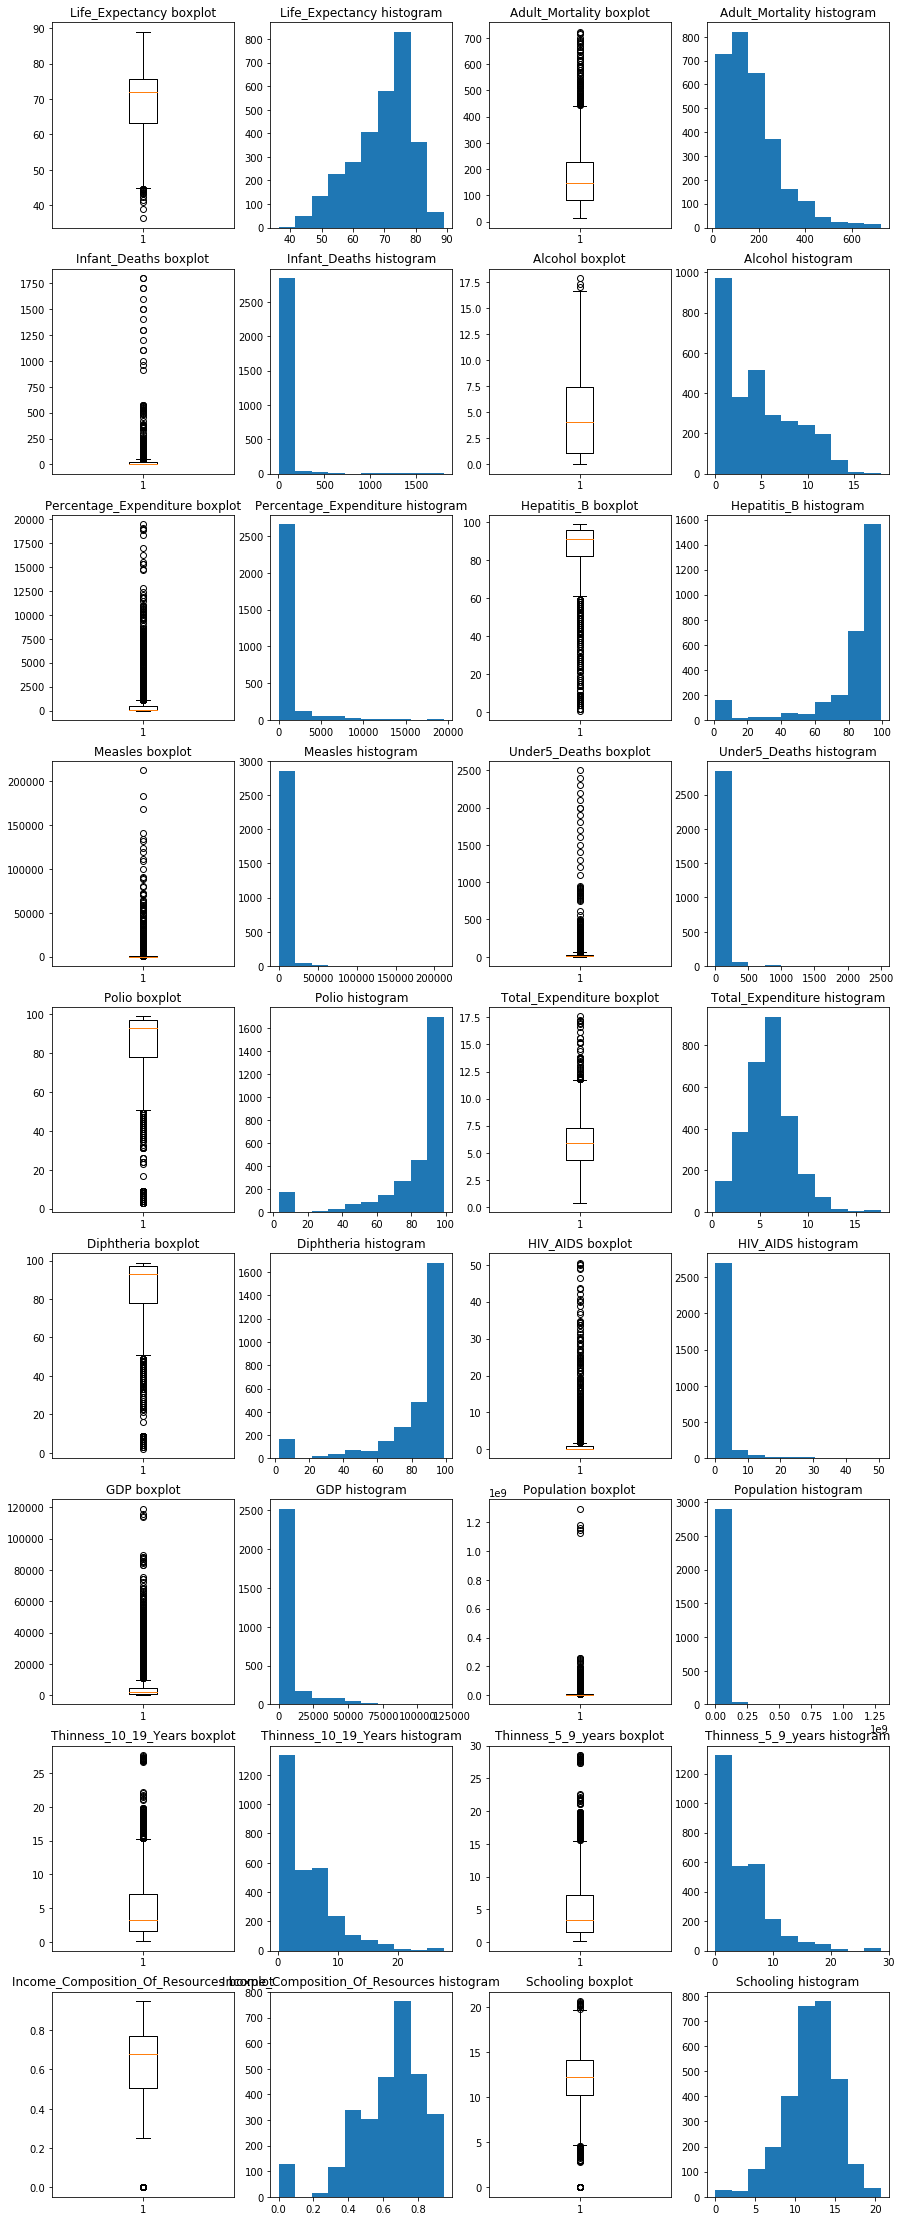

In [15]:
# 각 변수의 boxplot과 histogram 그래프로 이상치 존재 파악 함수

def outliers_graph(df):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in var:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(df[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(df[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_graph(life_data)

In [16]:
# 2*iqr을 기준으로 각 열의 이상치 개수와 비율 출력 함수

def outlier_number_percent(col, df):
    print(12*'-' + col + 12*'-')
    pct75, pct25 = np.percentile(df[col], [75, 25])
    iqr = pct75 - pct25
    min_value = pct25 - (iqr*2)
    max_value = pct75 + (iqr*2)
    count = len(np.where((df[col] > max_value) | (df[col] < min_value))[0])
    percent = round(count/len(df[col])*100, 2)
    print('Number of outliers: {}'.format(count))
    print('Percent outlier: {}%'.format(percent))

In [17]:
for col in var:
    outlier_number_percent(col,life_data)

------------Life_Expectancy------------
Number of outliers: 1
Percent outlier: 0.03%
------------Adult_Mortality------------
Number of outliers: 50
Percent outlier: 1.7%
------------Infant_Deaths------------
Number of outliers: 290
Percent outlier: 9.87%
------------Alcohol------------
Number of outliers: 0
Percent outlier: 0.0%
------------Percentage_Expenditure------------
Number of outliers: 349
Percent outlier: 11.88%
------------Hepatitis_B------------
Number of outliers: 289
Percent outlier: 9.84%
------------Measles------------
Number of outliers: 513
Percent outlier: 17.46%
------------Under5_Deaths------------
Number of outliers: 371
Percent outlier: 12.63%
------------Polio------------
Number of outliers: 202
Percent outlier: 6.88%
------------Total_Expenditure------------
Number of outliers: 26
Percent outlier: 0.88%
------------Diphtheria------------
Number of outliers: 230
Percent outlier: 7.83%
------------HIV_AIDS------------
Number of outliers: 474
Percent outlier: 16.1

In [18]:
# winsorize 방법으로 이상치 처리

life_wins_dict = {}     # 이상치가 처리된 데이터를 저장하는 딕셔너리

def winsorize_graph(df, col, lower_limit=0, upper_limit=0, show_plot=True):
    life_wins = winsorize(df[col], limits=(lower_limit, upper_limit))
    life_wins_dict[col] = life_wins
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(life_wins)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

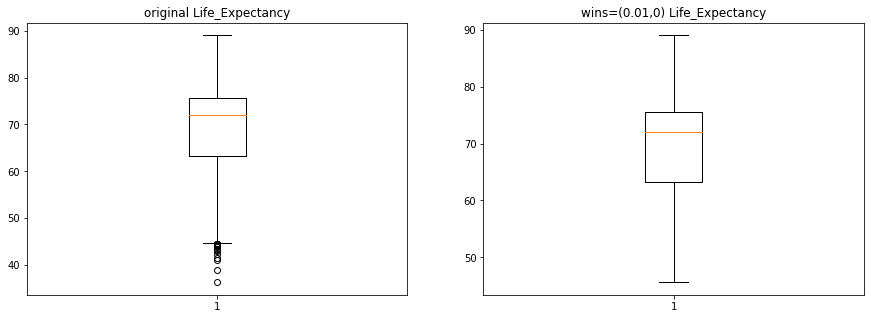

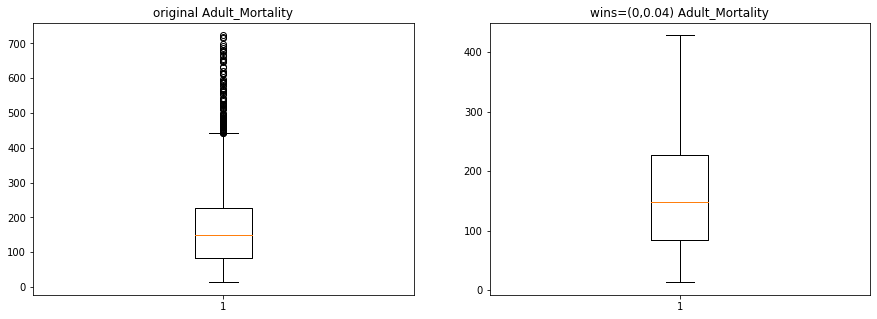

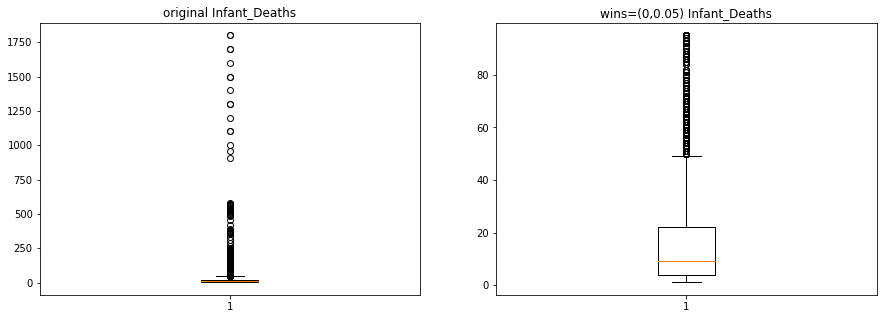

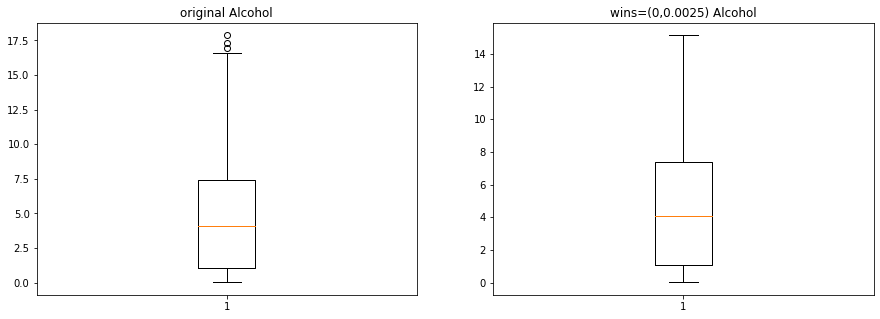

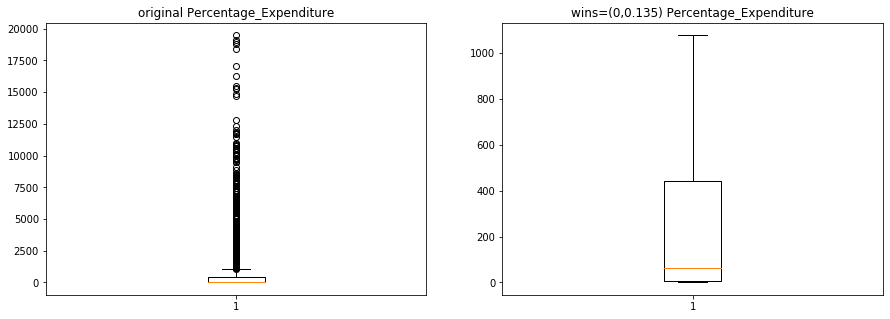

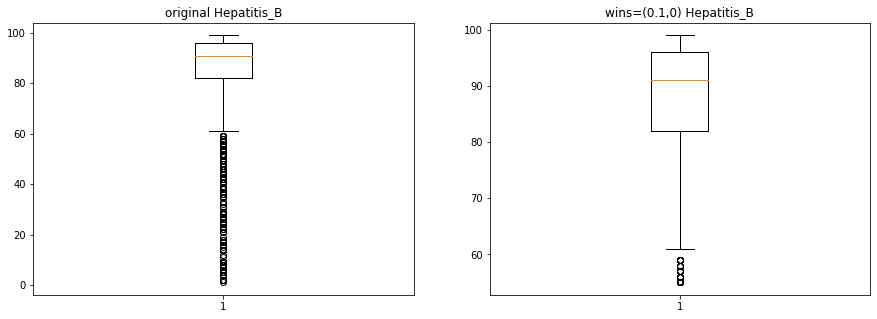

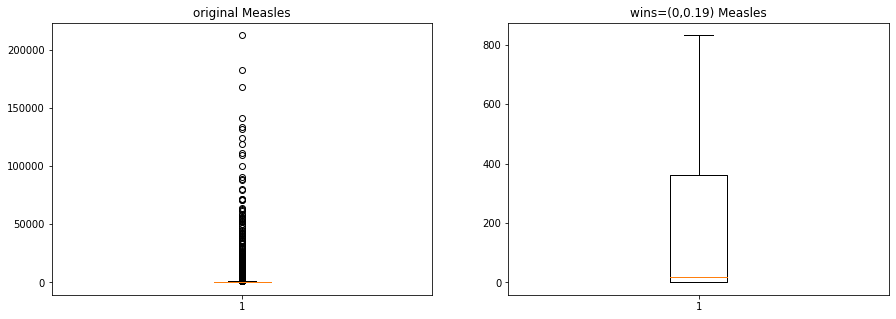

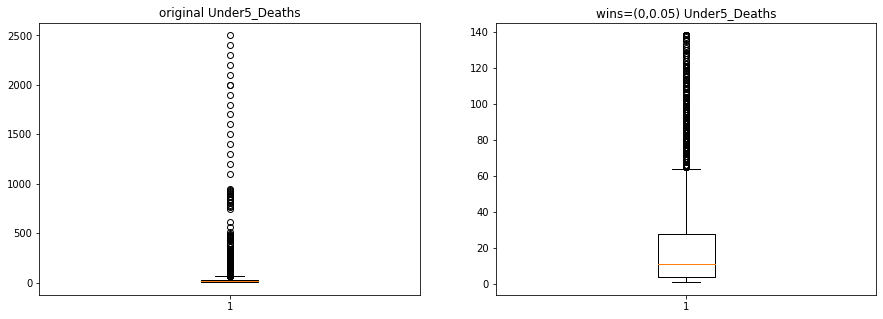

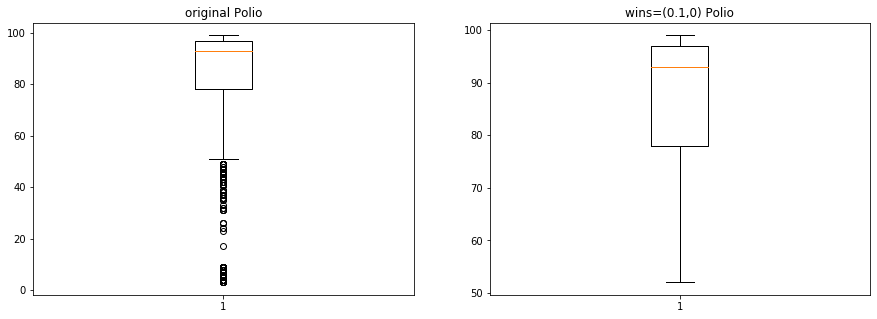

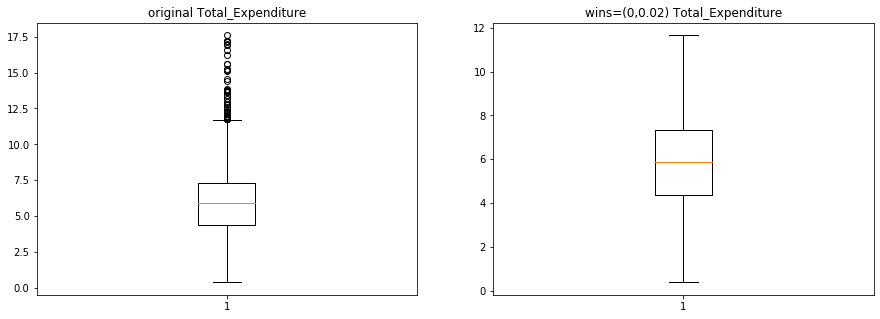

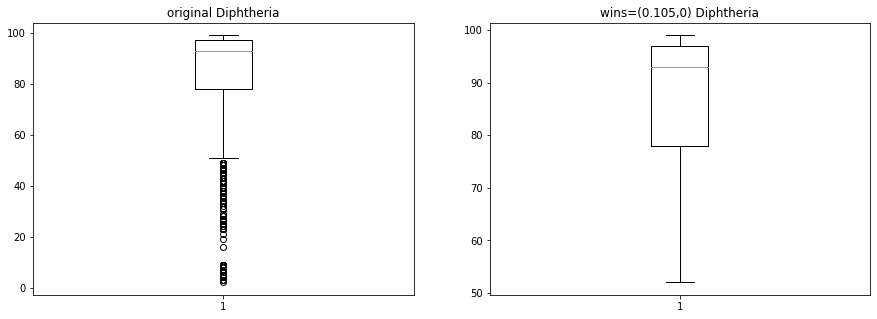

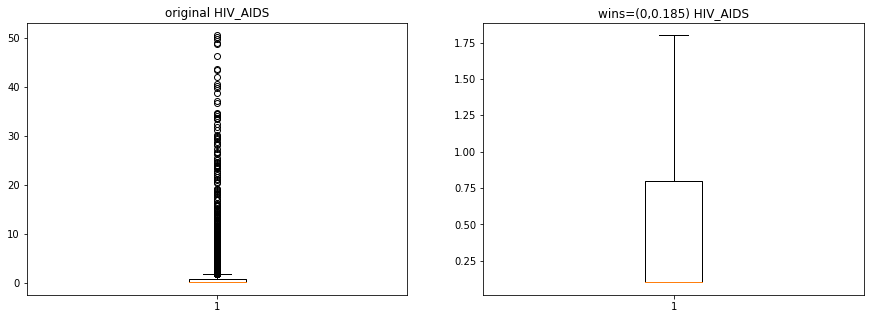

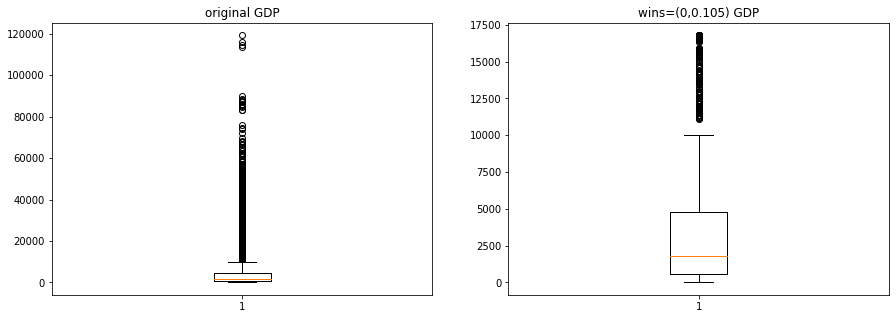

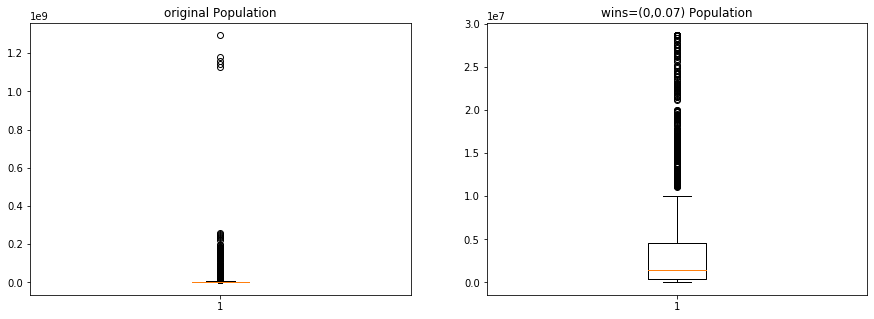

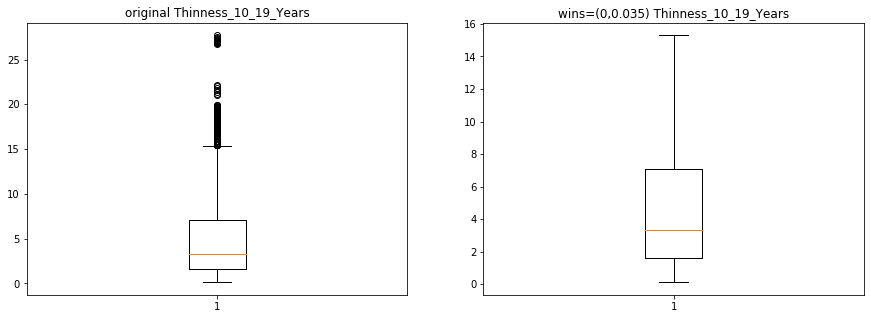

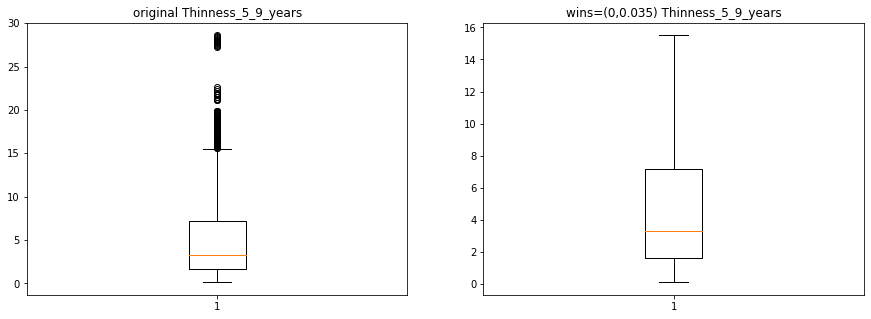

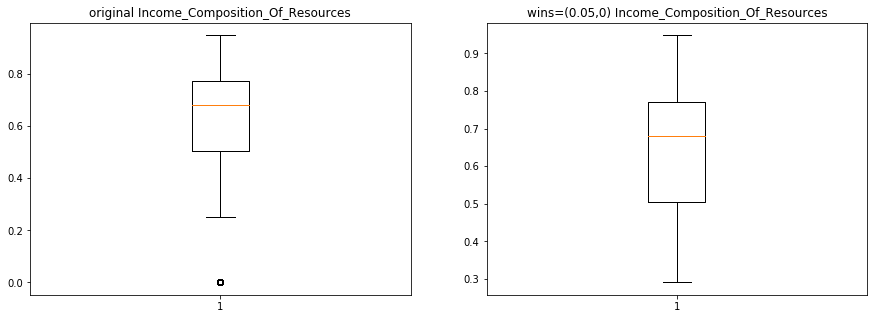

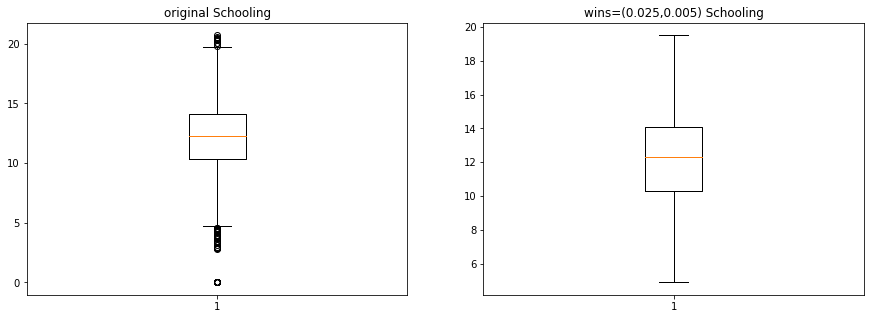

In [19]:
winsorize_graph(life_data, var[0], lower_limit=.01, show_plot=True)
winsorize_graph(life_data, var[1], upper_limit=.04, show_plot=True)
winsorize_graph(life_data, var[2], upper_limit=.05, show_plot=True)
winsorize_graph(life_data, var[3], upper_limit=.0025, show_plot=True)
winsorize_graph(life_data, var[4], upper_limit=.135, show_plot=True)
winsorize_graph(life_data, var[5], lower_limit=.1, show_plot=True)
winsorize_graph(life_data, var[6], upper_limit=.19, show_plot=True)
winsorize_graph(life_data, var[7], upper_limit=.05, show_plot=True)
winsorize_graph(life_data, var[8], lower_limit=.1, show_plot=True)
winsorize_graph(life_data, var[9], upper_limit=.02, show_plot=True)
winsorize_graph(life_data, var[10], lower_limit=.105, show_plot=True)
winsorize_graph(life_data, var[11], upper_limit=.185, show_plot=True)
winsorize_graph(life_data, var[12], upper_limit=.105, show_plot=True)
winsorize_graph(life_data, var[13], upper_limit=.07, show_plot=True)
winsorize_graph(life_data, var[14], upper_limit=.035, show_plot=True)
winsorize_graph(life_data, var[15], upper_limit=.035, show_plot=True)
winsorize_graph(life_data, var[16], lower_limit=.05, show_plot=True)
winsorize_graph(life_data, var[17], lower_limit=.025, upper_limit=.005, show_plot=True)

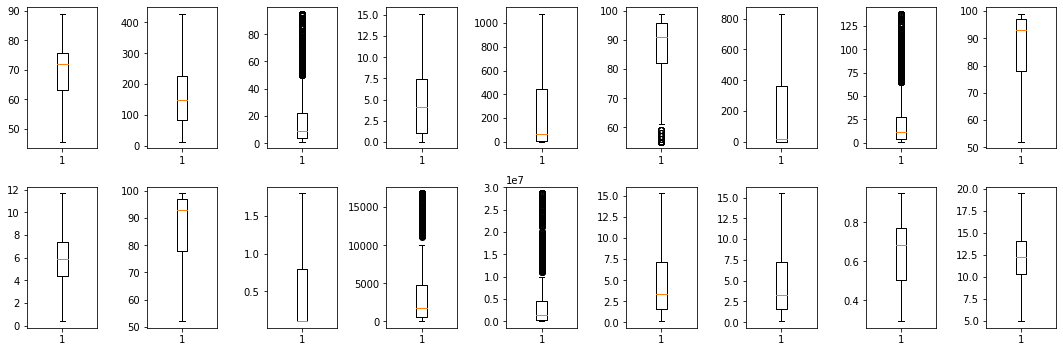

In [20]:
# 이상치 처리된 변수들 boxplot 그래프
plt.figure(figsize=(15,5))

for i, col in enumerate(var, 1):
    plt.subplot(2, 9, i)
    plt.boxplot(life_wins_dict[col])
plt.tight_layout()
plt.show()

In [21]:
life_wins_data = life_data.iloc[:,0:3]

for col in var:
    life_wins_data[col] = life_wins_dict[col]

### 아시아 데이터 생성

In [22]:
Asia = ["Oman", "Nepal","Jordan","Republic of Korea", "Uzbekistan","Timor-Leste", "Iraq","Laos",
        "Iran (Islamic Republic of)","Lebanon","Malaysia","India", "Maldives","Indonesia","Mongolia","Japan","Myanmar", 
        "Democratic People's Republic of Korea", "Bahrain", "China", "Bangladesh", "Kazakhstan", 
        "Viet Nam", "Qatar", "Bhutan", "Cambodia", "Brunei Darussalam", "Kuwait", "Saudi Arabia" , "Kyrgyzstan", 
        "Sri Lanka", "Thailand", 'Syrian Arab Republic', "Taiwan", "Singapore", "Tajikistan", "Arab Emirates", "Turkey", 
        "Turkmenistan", "Azerbaijan", "Pakistan", "Afghanistan", "Philippines", "Yemen"]

In [23]:
asia_data = life_wins_data[life_wins_data['Country'].isin(Asia)]

In [24]:
asia_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656 entries, 0 to 2905
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          656 non-null    category
 1   Year                             656 non-null    int64   
 2   Status                           656 non-null    category
 3   Life_Expectancy                  656 non-null    float64 
 4   Adult_Mortality                  656 non-null    float64 
 5   Infant_Deaths                    656 non-null    float64 
 6   Alcohol                          656 non-null    float64 
 7   Percentage_Expenditure           656 non-null    float64 
 8   Hepatitis_B                      656 non-null    float64 
 9   Measles                          656 non-null    int64   
 10  Under5_Deaths                    656 non-null    float64 
 11  Polio                            656 non-null    float64 
 12  Total_E

## 회귀 모델링

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
asia_data['Status'] = encoder.fit_transform(asia_data['Status'])

var2 = list(asia_data.columns)[2:]

C:\Users\bbori\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


**[Status 변수 인코딩 결과]**  
개발도상국 = 1  
선진국 = 0

In [26]:
asia_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656 entries, 0 to 2905
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          656 non-null    category
 1   Year                             656 non-null    int64   
 2   Status                           656 non-null    int32   
 3   Life_Expectancy                  656 non-null    float64 
 4   Adult_Mortality                  656 non-null    float64 
 5   Infant_Deaths                    656 non-null    float64 
 6   Alcohol                          656 non-null    float64 
 7   Percentage_Expenditure           656 non-null    float64 
 8   Hepatitis_B                      656 non-null    float64 
 9   Measles                          656 non-null    int64   
 10  Under5_Deaths                    656 non-null    float64 
 11  Polio                            656 non-null    float64 
 12  Total_E

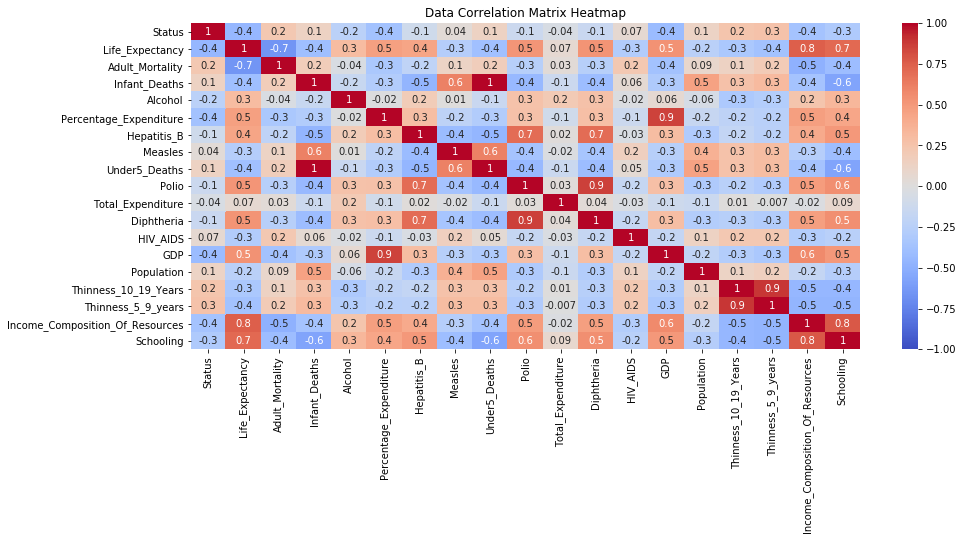

In [27]:
#mask = np.triu(life_train[var2].corr())

plt.figure(figsize=(15,6))
sns.heatmap(asia_data[var2].corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='coolwarm')
#plt.ylim(18, 0)
plt.title('Data Correlation Matrix Heatmap')
plt.show()

###### 기대수명과의 상관계수가 큰 변수
- Income_Composition_Of_Resources : 0.8 
- Schooling : 0.7
- Adult_Mortality : -0.7
- Polio / Diphtheria / GDP / Percentage_Expenditure: 0.5

### 단순선형회귀

In [28]:
# 상수항만 있는 모형
result_intercept = smf.ols('Life_Expectancy ~ 1', data=asia_data).fit()
result_intercept.summary()

C:\Users\bbori\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\bbori\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\bbori\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                nan
Time:                        15:20:24   Log-Likelihood:                -2069.9
No. Observations:                 656   AIC:                             4142.
Df Residuals:                     655   BIC:                             4146.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.7363      0.222    318.882      0.000      70.301      71.172
==============================================================================
Omnibus:                        2.442   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                2.108
Skew:                           0.020   Prob(JB):                        0.348
Kurtosis:                       2.725   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# 단순선형회귀 적합
result_slr = smf.ols('Life_Expectancy ~ Schooling', data=asia_data).fit()
result_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     678.6
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          3.58e-103
Time:                        15:20:24   Log-Likelihood:                -1836.5
No. Observations:                 656   AIC:                             3677.
Df Residuals:                     654   BIC:                             3686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.2450      0.877     54.995      0.000      46.522      49.968
Schooling      1.9274      0.074     26.050      0.000       1.782       2.073
==============================================================================
Omnibus:                        1.749   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.568
Skew:                           0.096   Prob(JB):                        0.457
Kurtosis:                       3.143   Cond. No.                         67.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

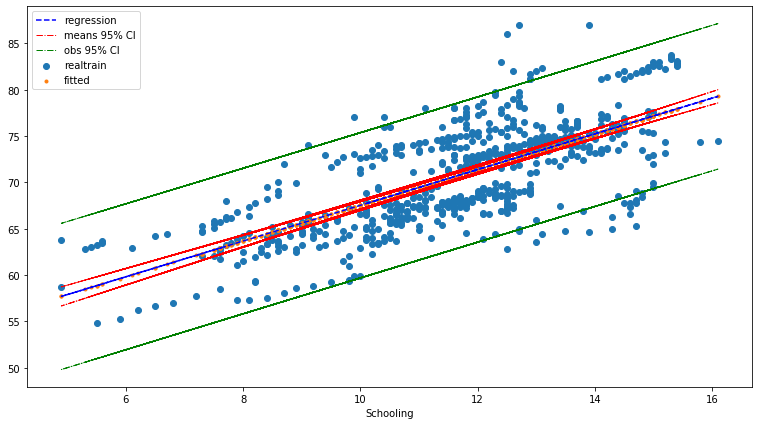

In [30]:
# 단순선형회귀 시각화
plt.figure(figsize=(13,7))

plt.scatter(asia_data['Schooling'], asia_data['Life_Expectancy'], marker='o', label='realtrain')
plt.scatter(asia_data['Schooling'], result_slr.fittedvalues, marker='.', label='fitted')
plt.plot(asia_data['Schooling'], result_slr.predict(asia_data['Schooling']), color='blue', linestyle='dashed', label='regression', markersize=0)

pred_slr = result_slr.get_prediction().summary_frame()

plt.plot(asia_data['Schooling'], pred_slr['mean_ci_lower'], 'r-.', label='means 95% CI', linewidth=1)
plt.plot(asia_data['Schooling'], pred_slr['mean_ci_upper'], 'r-.', linewidth=1)
plt.plot(asia_data['Schooling'], pred_slr['obs_ci_lower'], 'g-.', label='obs 95% CI', linewidth=1)
plt.plot(asia_data['Schooling'], pred_slr['obs_ci_upper'], 'g-.', linewidth=1)
plt.xlabel('Schooling')
plt.legend()

#### 모델 가정 확인

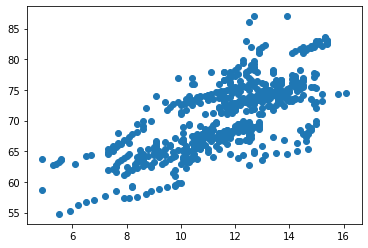

In [31]:
# 선형성 (상관계수 = 0.7)
plt.scatter('Schooling','Life_Expectancy',data=asia_data)

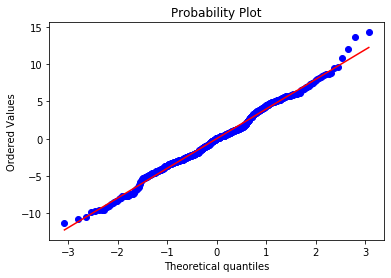

In [32]:
# 정규성
resid_slr = result_slr.resid

stats.probplot(resid_slr,plot=plt)
plt.show()

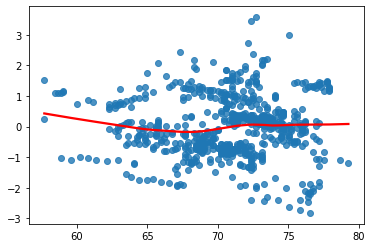

In [83]:
# 등분산성
fitted_slr = result_slr.predict(asia_data)
sns.regplot(fitted_slr, stats.zscore(resid_slr),lowess = True, line_kws={'color' : 'red'})
#plt.xlim(55.0, 71.50)
plt.show()

### 다중 선형 회귀

#### mlr1 : Adult_Mortality 변수 추가

In [34]:
result_mlr1 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality', data=asia_data).fit()
result_mlr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     651.5
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          2.71e-156
Time:                        15:20:25   Log-Likelihood:                -1710.1
No. Observations:                 656   AIC:                             3426.
Df Residuals:                     653   BIC:                             3440.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          58.7724      0.941     62.462      0.000      56.925      60.620
Schooling           1.4433      0.067     21.532      0.000       1.312       1.575
Adult_Mortality    -0.0339      0.002    -17.520      0.000      -0.038      -0.030
==============================================================================
Omnibus:                       29.621   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.456
Skew:                          -0.225   Prob(JB):                     3.71e-15
Kurtosis:                       4.493   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**공선성 경고를 확인하기 위해 VIF 지수 확인**

In [35]:
y, X = dmatrices('Life_Expectancy ~ + Schooling + Adult_Mortality', asia_data, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,53.732490,Intercept
1,1.204747,Schooling
2,1.204747,Adult_Mortality


=> 심각한 공선성 문제를 유발하는 변수 없음

#### mlr1 _ scatter plot

Text(0, 0.5, 'Y_hat1')

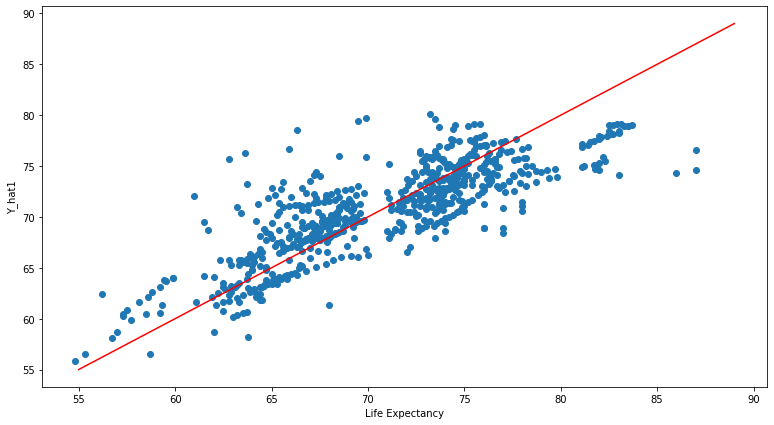

In [36]:
y = asia_data['Life_Expectancy']
y_hat1 = result_mlr1.predict(asia_data[['Schooling','Adult_Mortality']])

# 시각화
plt.figure(figsize=(13,7))
plt.scatter(y, y_hat1, marker='o', label='Scatter plot of mlr1')
x = np.arange(55, 90)
plt.plot(x,x, 'red')
plt.xlabel('Life Expectancy')
plt.ylabel('Y_hat1')


#### mlr2 : GDP 변수 추가

In [37]:
result_mlr2 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + GDP ', data=asia_data).fit()
result_mlr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     463.9
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          3.03e-161
Time:                        15:20:25   Log-Likelihood:                -1695.2
No. Observations:                 656   AIC:                             3398.
Df Residuals:                     652   BIC:                             3416.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          59.7656      0.938     63.708      0.000      57.924      61.608
Schooling           1.2789      0.072     17.743      0.000       1.137       1.420
Adult_Mortality    -0.0317      0.002    -16.358      0.000      -0.036      -0.028
GDP                 0.0002   2.91e-05      5.498      0.000       0.000       0.000
==============================================================================
Omnibus:                       23.625   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.345
Skew:                          -0.089   Prob(JB):                     5.82e-13
Kurtosis:                       4.425   Cond. No.                     4.76e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**공선성 경고를 확인하기 위해 VIF 지수 확인**

In [38]:
y, X = dmatrices('Life_Expectancy ~ Schooling + Adult_Mortality + GDP', asia_data, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,55.801792,Intercept
1,1.455288,Schooling
2,1.260119,Adult_Mortality
3,1.403027,GDP


=> 심각한 공선성 문제를 유발하는 변수 없음

#### mlr2_Scatter Plot

Text(0.5, 1.0, 'Scatter Plot of mlr2')

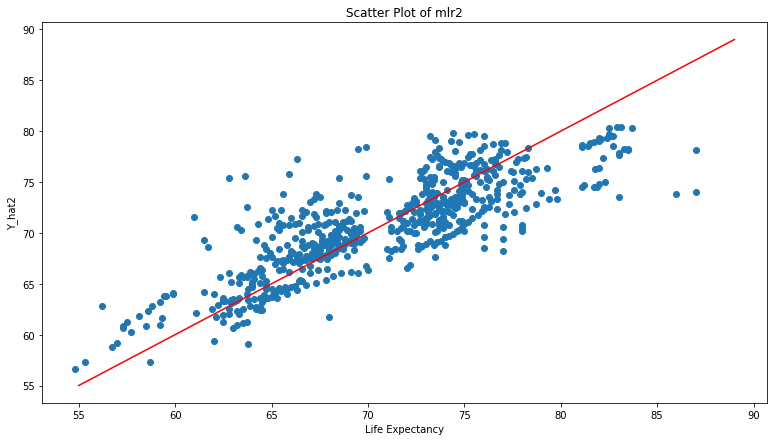

In [39]:
y = asia_data['Life_Expectancy']
y_hat2 = result_mlr2.predict(asia_data[['Schooling','Adult_Mortality','GDP']])

# 시각화
plt.figure(figsize=(13,7))

plt.scatter(y, y_hat2, marker='o')
x = np.arange(55, 90)
plt.plot(x,x, 'red')
plt.xlabel('Life Expectancy')
plt.ylabel('Y_hat2')
plt.title('Scatter Plot of mlr2')


#### mlr3 : Polio 변수 추가

In [40]:
result_mlr3 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + GDP + Polio', data=asia_data).fit()
result_mlr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     380.6
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          8.99e-169
Time:                        15:20:26   Log-Likelihood:                -1674.5
No. Observations:                 656   AIC:                             3359.
Df Residuals:                     651   BIC:                             3382.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          56.5853      1.033     54.794      0.000      54.558      58.613
Schooling           1.0369      0.079     13.097      0.000       0.881       1.192
Adult_Mortality    -0.0313      0.002    -16.631      0.000      -0.035      -0.028
GDP                 0.0002   2.82e-05      5.630      0.000       0.000       0.000
Polio               0.0676      0.010      6.507      0.000       0.047       0.088
==============================================================================
Omnibus:                       20.919   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.747
Skew:                           0.097   Prob(JB):                     1.16e-10
Kurtosis:                       4.279   Cond. No.                     5.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**공선성 경고를 확인하기 위해 VIF 지수 확인**

In [41]:
y, X = dmatrices('Life_Expectancy ~ Schooling + Adult_Mortality + GDP + Polio', asia_data, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,71.906897,Intercept
1,1.867208,Schooling
2,1.261652,Adult_Mortality
3,1.403077,GDP
4,1.439046,Polio


=> 다중공선성 문제 없음

#### ml3_Scatter Plot

Text(0.5, 1.0, 'Scatter Plot of mlr3')

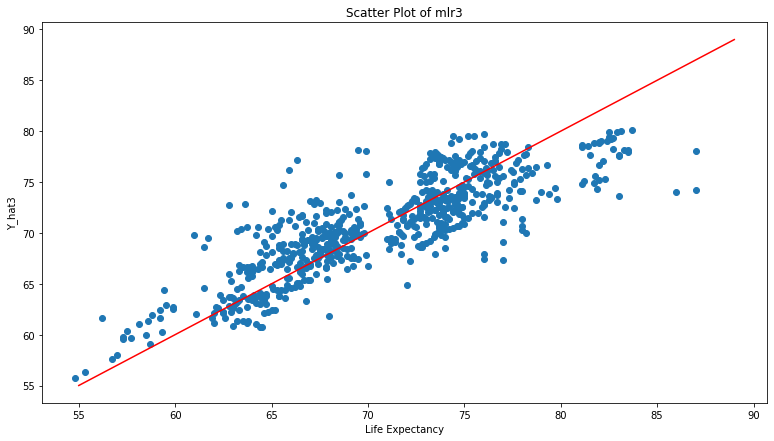

In [42]:
y = asia_data['Life_Expectancy']
y_hat3 = result_mlr3.predict(asia_data[['Schooling','Adult_Mortality','GDP','Polio']])

# 시각화
plt.figure(figsize=(13,7))

plt.scatter(y, y_hat3, marker='o')
x = np.arange(55, 90)
plt.plot(x,x, 'red')
plt.xlabel('Life Expectancy')
plt.ylabel('Y_hat3')
plt.title('Scatter Plot of mlr3')


#### mlr4 : Income_Composition_Of_Resources 변수 추가

*Schooling과 높은 상관관계가 있음*

In [43]:
result_mlr4 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + GDP + Polio + Income_Composition_Of_Resources', data=asia_data).fit()
result_mlr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     347.3
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          7.33e-181
Time:                        15:20:26   Log-Likelihood:                -1643.3
No. Observations:                 656   AIC:                             3299.
Df Residuals:                     650   BIC:                             3326.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          54.7237      1.012     54.065      0.000      52.736      56.711
Schooling                           0.6007      0.093      6.463      0.000       0.418       0.783
Adult_Mortality                    -0.0277      0.002    -14.972      0.000      -0.031      -0.024
GDP                              9.191e-05   2.82e-05      3.263      0.001    3.66e-05       0.000
Polio                               0.0584      0.010      5.857      0.000       0.039       0.078
Income_Composition_Of_Resources    11.6166      1.442      8.055      0.000       8.785      14.448
==============================================================================
Omnibus:                       27.864   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.127
Skew:                           0.242   Prob(JB):                     3.94e-13
Kurtosis:                       4.363   Cond. No.                     8.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**공선성 경고를 확인하기 위해 VIF 지수 확인**

In [44]:
y, X = dmatrices('Life_Expectancy ~ Schooling + Adult_Mortality + GDP + Polio + Income_Composition_Of_Resources', asia_data, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,75.861215,Intercept
1,2.826229,Schooling
2,1.339495,Adult_Mortality
3,1.536634,GDP
4,1.457976,Polio
5,3.048936,Income_Composition_Of_Resources


=> Schooling과 Income 변수 사이의 상관계수가 높지만, 모형 적합 결과 계수도 유의하고 vif값도 크지 않다.

#### mlr4_Scatter Plot

Text(0.5, 1.0, 'Scatter Plot of mlr4')

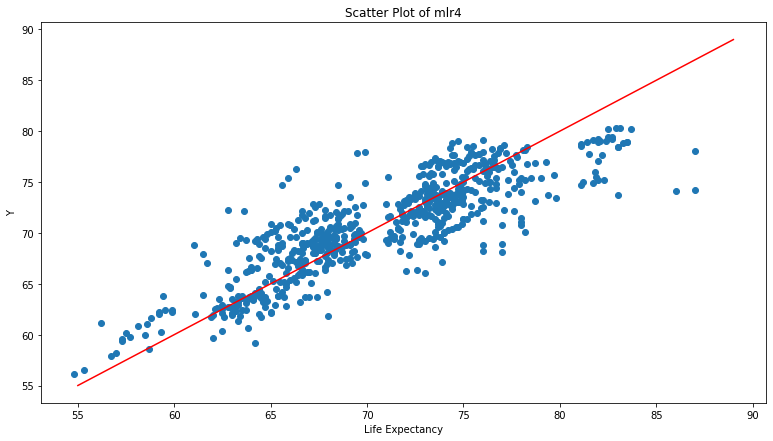

In [45]:
y = asia_data['Life_Expectancy']
y_hat4 = result_mlr4.predict(asia_data[['Schooling','Adult_Mortality','GDP','Polio','Income_Composition_Of_Resources']])

# 시각화
plt.figure(figsize=(13,7))

plt.scatter(y, y_hat4, marker='o')
x = np.arange(55, 90)
plt.plot(x,x, 'red')
plt.xlabel('Life Expectancy')
plt.ylabel('Y')
plt.title('Scatter Plot of mlr4')


#### mlr5 :Diphtheria 변수 추가

*Polio 변수와 높은 상관관계가 있음*

In [46]:
result_mlr5 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + GDP + Polio + Income_Composition_Of_Resources + Diphtheria', data=asia_data).fit()
result_mlr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     295.5
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          7.49e-182
Time:                        15:20:26   Log-Likelihood:                -1638.0
No. Observations:                 656   AIC:                             3290.
Df Residuals:                     649   BIC:                             3321.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          54.0663      1.025     52.757      0.000      52.054      56.079
Schooling                           0.5619      0.093      6.040      0.000       0.379       0.745
Adult_Mortality                    -0.0277      0.002    -15.068      0.000      -0.031      -0.024
GDP                              8.975e-05    2.8e-05      3.209      0.001    3.48e-05       0.000
Polio                               0.0157      0.016      0.955      0.340      -0.017       0.048
Income_Composition_Of_Resources    11.6823      1.432      8.160      0.000       8.871      14.493
Diphtheria                          0.0551      0.017      3.260      0.001       0.022       0.088
==============================================================================
Omnibus:                       27.448   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.434
Skew:                           0.257   Prob(JB):                     2.49e-12
Kurtosis:                       4.300   Cond. No.                     8.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=> Polio 변수의 계수가 유의하지 않음

**공선성 경고를 확인하기 위해 VIF 지수 확인**

In [47]:
y, X = dmatrices('Life_Expectancy ~ Schooling + Adult_Mortality + GDP + Polio + Income_Composition_Of_Resources + Diphtheria', asia_data , return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,78.918075,Intercept
1,2.873354,Schooling
2,1.339520,Adult_Mortality
3,1.537494,GDP
4,4.013564,Polio
5,3.049541,Income_Composition_Of_Resources
6,3.977815,Diphtheria


=> Polio 변수의 계수 유의성과 vif값을 확인한 결과, Polio 변수를 제거한다

#### mlr6: Polio 변수 제거

In [48]:
result_mlr6 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + GDP + Income_Composition_Of_Resources + Diphtheria', data=asia_data).fit()
result_mlr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     354.4
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          5.96e-183
Time:                        15:20:26   Log-Likelihood:                -1638.5
No. Observations:                 656   AIC:                             3289.
Df Residuals:                     650   BIC:                             3316.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          54.1623      1.020     53.110      0.000      52.160      56.165
Schooling                           0.5694      0.093      6.143      0.000       0.387       0.751
Adult_Mortality                    -0.0277      0.002    -15.070      0.000      -0.031      -0.024
GDP                               8.88e-05   2.79e-05      3.177      0.002    3.39e-05       0.000
Income_Composition_Of_Resources    11.7915      1.427      8.263      0.000       8.989      14.594
Diphtheria                          0.0679      0.010      6.673      0.000       0.048       0.088
==============================================================================
Omnibus:                       27.163   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.696
Skew:                           0.255   Prob(JB):                     3.61e-12
Kurtosis:                       4.291   Cond. No.                     8.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=> Polio 변수를 제거해도 모형의 R제곱 값이 유지되고 AIC, BIC값은 감소한다

**공선성 경고를 확인하기 위해 VIF 지수 확인**

In [49]:
y, X = dmatrices('Life_Expectancy ~ Schooling + Adult_Mortality + GDP + Income_Composition_Of_Resources + Diphtheria', asia_data, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,78.158920,Intercept
1,2.852667,Schooling
2,1.339520,Adult_Mortality
3,1.535538,GDP
4,3.030070,Income_Composition_Of_Resources
5,1.444990,Diphtheria


=> 다중공선성 문제를 일으키는 변수 없음

#### mlr6_Scatter Plot

Text(0.5, 1.0, 'Scatter Plot of mlr6')

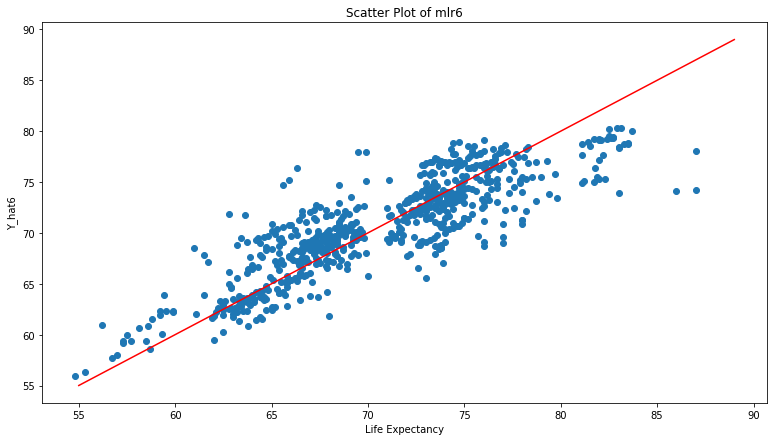

In [50]:
y = asia_data['Life_Expectancy']
y_hat6 = result_mlr6.predict(asia_data[['Schooling','Adult_Mortality','GDP','Income_Composition_Of_Resources','Diphtheria']])

# 시각화
plt.figure(figsize=(13,7))

plt.scatter(y, y_hat6, marker='o')
x = np.arange(55, 90)
plt.plot(x,x, 'red')
plt.xlabel('Life Expectancy')
plt.ylabel('Y_hat6')
plt.title('Scatter Plot of mlr6')


#### mlr7: Percentage_Expenditure 변수 추가

In [51]:
result_mlr7 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + GDP + Income_Composition_Of_Resources + Diphtheria + Percentage_Expenditure', data=asia_data).fit()
result_mlr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     295.2
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          9.18e-182
Time:                        15:20:26   Log-Likelihood:                -1638.2
No. Observations:                 656   AIC:                             3290.
Df Residuals:                     649   BIC:                             3322.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          54.1788      1.020     53.092      0.000      52.175      56.183
Schooling                           0.5674      0.093      6.117      0.000       0.385       0.750
Adult_Mortality                    -0.0276      0.002    -15.048      0.000      -0.031      -0.024
GDP                              6.224e-05   4.67e-05      1.332      0.183   -2.95e-05       0.000
Income_Composition_Of_Resources    11.8684      1.432      8.290      0.000       9.057      14.680
Diphtheria                          0.0674      0.010      6.603      0.000       0.047       0.087
Percentage_Expenditure              0.0005      0.001      0.709      0.478      -0.001       0.002
==============================================================================
Omnibus:                       28.081   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.900
Skew:                           0.263   Prob(JB):                     1.20e-12
Kurtosis:                       4.316   Cond. No.                     8.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=> R제곱값은 유지되지만 오히려 AIC, BIC값이 증가한다. 또한, GDP와 Percentage 변수의 계수가 유의하지 않다. 따라서 추가한 변수 Percentage는 다시 모형에서 제거한다.

#### mlr8 : Status 변수 추가

In [52]:
result_mlr8 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + GDP + Income_Composition_Of_Resources + Diphtheria + Status', data=asia_data).fit()
result_mlr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     338.5
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          4.32e-196
Time:                        15:20:27   Log-Likelihood:                -1604.8
No. Observations:                 656   AIC:                             3224.
Df Residuals:                     649   BIC:                             3255.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          59.5454      1.163     51.192      0.000      57.261      61.829
Schooling                           0.5553      0.088      6.301      0.000       0.382       0.728
Adult_Mortality                    -0.0274      0.002    -15.701      0.000      -0.031      -0.024
GDP                              2.712e-05   2.76e-05      0.983      0.326    -2.7e-05    8.13e-05
Income_Composition_Of_Resources    10.4470      1.366      7.647      0.000       7.764      13.129
Diphtheria                          0.0723      0.010      7.456      0.000       0.053       0.091
Status                             -4.7681      0.569     -8.376      0.000      -5.886      -3.650
==============================================================================
Omnibus:                       43.589   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.387
Skew:                           0.318   Prob(JB):                     1.45e-25
Kurtosis:                       4.944   Cond. No.                     8.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=> GDP 변수의 계수 유의하지 않다. Status 변수를 유지하고 GDP 변수를 제거한다

#### mlr9 : GDP 변수 제거

In [53]:
result_mlr9 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Composition_Of_Resources + Diphtheria + Status', data=asia_data).fit()
result_mlr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     406.0
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          3.30e-197
Time:                        15:20:27   Log-Likelihood:                -1605.3
No. Observations:                 656   AIC:                             3223.
Df Residuals:                     650   BIC:                             3249.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          59.5004      1.162     51.194      0.000      57.218      61.783
Schooling                           0.5636      0.088      6.424      0.000       0.391       0.736
Adult_Mortality                    -0.0276      0.002    -15.916      0.000      -0.031      -0.024
Income_Composition_Of_Resources    10.7820      1.323      8.150      0.000       8.184      13.380
Diphtheria                          0.0723      0.010      7.463      0.000       0.053       0.091
Status                             -4.9176      0.549     -8.965      0.000      -5.995      -3.841
==============================================================================
Omnibus:                       41.754   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.096
Skew:                           0.294   Prob(JB):                     7.51e-25
Kurtosis:                       4.929   Cond. No.                     2.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=> GDP 변수를 제거해도 R제곱값이 유지되고 AIC, BIC값이 감소한다.

**공선성 경고를 확인하기 위해 VIF 지수 확인**

In [54]:
y, X = dmatrices('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Composition_Of_Resources + Diphtheria + Status', asia_data, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,112.324822,Intercept
1,2.827886,Schooling
2,1.322601,Adult_Mortality
3,2.881511,Income_Composition_Of_Resources
4,1.449053,Diphtheria
5,1.160955,Status


=> 다중공선성 문제 없음

#### mlr9_Scatter Plot

Text(0.5, 1.0, 'Scatter Plot of mlr9')

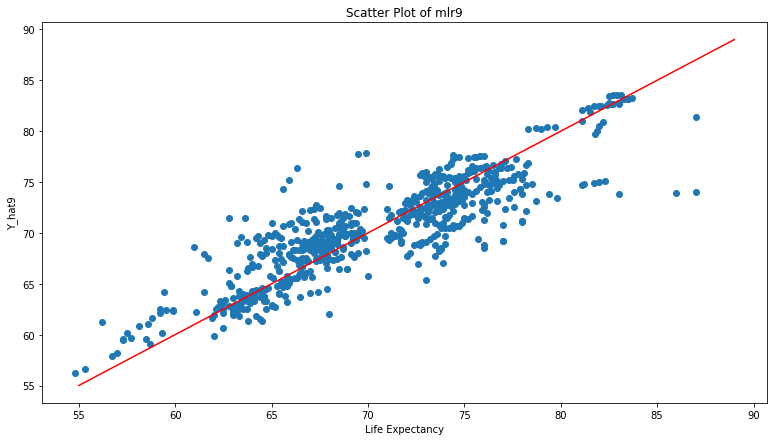

In [55]:
y = asia_data['Life_Expectancy']
y_hat9 = result_mlr9.predict(asia_data[['Schooling','Adult_Mortality','Income_Composition_Of_Resources','Diphtheria','Status']])

# 시각화
plt.figure(figsize=(13,7))

plt.scatter(y, y_hat9, marker='o')
x = np.arange(55, 90)
plt.plot(x,x, 'red')
plt.xlabel('Life Expectancy')
plt.ylabel('Y_hat9')
plt.title('Scatter Plot of mlr9')


#### mlr10 : Thinness_5_9_years 변수 추가

In [56]:
result_mlr10 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Composition_Of_Resources + Diphtheria + Status + Thinness_5_9_years ', data=asia_data).fit()
result_mlr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     339.1
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          2.79e-196
Time:                        15:20:27   Log-Likelihood:                -1604.4
No. Observations:                 656   AIC:                             3223.
Df Residuals:                     649   BIC:                             3254.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          58.8334      1.261     46.653      0.000      56.357      61.310
Schooling                           0.5826      0.089      6.562      0.000       0.408       0.757
Adult_Mortality                    -0.0275      0.002    -15.832      0.000      -0.031      -0.024
Income_Composition_Of_Resources    11.0958      1.342      8.267      0.000       8.460      13.731
Diphtheria                          0.0728      0.010      7.512      0.000       0.054       0.092
Status                             -5.0031      0.552     -9.067      0.000      -6.087      -3.920
Thinness_5_9_years                  0.0349      0.026      1.358      0.175      -0.016       0.085
==============================================================================
Omnibus:                       47.975   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.497
Skew:                           0.348   Prob(JB):                     4.60e-29
Kurtosis:                       5.071   Cond. No.                     2.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=> Thinness_5_9_years 계수가 유의하지 않음. R제곱과 AIC는 유지되고 BIC는 증가한다. 따라서 Thinness 변수는 제거한다. (mlr9로 돌아감)

#### mlr11 : Thinness_10_19_Years 변수 추가

In [57]:
result_mlr11 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Composition_Of_Resources + Diphtheria + Status + Thinness_10_19_Years ', data=asia_data).fit()
result_mlr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     340.1
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          1.31e-196
Time:                        15:20:27   Log-Likelihood:                -1603.6
No. Observations:                 656   AIC:                             3221.
Df Residuals:                     649   BIC:                             3253.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          58.5682      1.267     46.235      0.000      56.081      61.056
Schooling                           0.5912      0.089      6.653      0.000       0.417       0.766
Adult_Mortality                    -0.0272      0.002    -15.577      0.000      -0.031      -0.024
Income_Composition_Of_Resources    11.2467      1.345      8.364      0.000       8.606      13.887
Diphtheria                          0.0724      0.010      7.481      0.000       0.053       0.091
Status                             -5.0205      0.550     -9.121      0.000      -6.101      -3.940
Thinness_10_19_Years                0.0470      0.026      1.833      0.067      -0.003       0.097
==============================================================================
Omnibus:                       49.510   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.007
Skew:                           0.359   Prob(JB):                     2.93e-30
Kurtosis:                       5.112   Cond. No.                     2.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=> Thinness_10_19 변수의 계수가 유의하지 않다. R제곱 값은 유지되지만 오히려 BIC값은 증가한다. 따라서 이 변수도 모형에서 제거한다. (mlr9로 돌아감)

#### mlr12 : Infant_Deaths 변수 추가

In [58]:
result_mlr12 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Composition_Of_Resources + Diphtheria + Status + Infant_Deaths', data=asia_data).fit()
result_mlr12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     338.4
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          4.53e-196
Time:                        15:20:27   Log-Likelihood:                -1604.9
No. Observations:                 656   AIC:                             3224.
Df Residuals:                     649   BIC:                             3255.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          60.0820      1.319     45.541      0.000      57.491      62.673
Schooling                           0.5240      0.097      5.376      0.000       0.333       0.715
Adult_Mortality                    -0.0276      0.002    -15.935      0.000      -0.031      -0.024
Income_Composition_Of_Resources    10.9670      1.338      8.197      0.000       8.340      13.594
Diphtheria                          0.0709      0.010      7.214      0.000       0.052       0.090
Status                             -4.9170      0.549     -8.963      0.000      -5.994      -3.840
Infant_Deaths                      -0.0041      0.004     -0.932      0.352      -0.013       0.005
==============================================================================
Omnibus:                       40.036   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.690
Skew:                           0.267   Prob(JB):                     2.50e-24
Kurtosis:                       4.922   Cond. No.                     2.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=> Infant 변수의 계수가 유의하지 않다. R제곱 값은 유지되지만 오히려 AIC, BIC값은 증가한다. 따라서 Infant 변수도 모형에서 제거한다. (mlr9로 돌아감)

#### mlr13: Alcohol 변수 추가

In [59]:
result_mlr13 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Composition_Of_Resources + Diphtheria + Status + Alcohol', data=asia_data).fit()
result_mlr13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     350.0
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          1.14e-199
Time:                        15:20:27   Log-Likelihood:                -1596.5
No. Observations:                 656   AIC:                             3207.
Df Residuals:                     649   BIC:                             3238.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          60.0002      1.154     52.006      0.000      57.735      62.266
Schooling                           0.4883      0.088      5.521      0.000       0.315       0.662
Adult_Mortality                    -0.0285      0.002    -16.520      0.000      -0.032      -0.025
Income_Composition_Of_Resources    10.9995      1.307      8.414      0.000       8.433      13.566
Diphtheria                          0.0676      0.010      7.009      0.000       0.049       0.086
Status                             -4.5323      0.549     -8.251      0.000      -5.611      -3.454
Alcohol                             0.2133      0.051      4.208      0.000       0.114       0.313
==============================================================================
Omnibus:                       29.672   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.535
Skew:                           0.050   Prob(JB):                     2.67e-19
Kurtosis:                       4.766   Cond. No.                     2.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**공선성 경고를 확인하기 위해 VIF 지수 확인**

In [60]:
y, X = dmatrices('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Composition_Of_Resources + Diphtheria + Status + Alcohol', asia_data, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,113.528118,Intercept
1,2.948350,Schooling
2,1.343768,Adult_Mortality
3,2.886023,Income_Composition_Of_Resources
4,1.469524,Diphtheria
5,1.194137,Status
6,1.191567,Alcohol


=> 다중공선성 문제 없음

#### mlr13_Scatter Plot

Text(0.5, 1.0, 'Scatter Plot of mlr13')

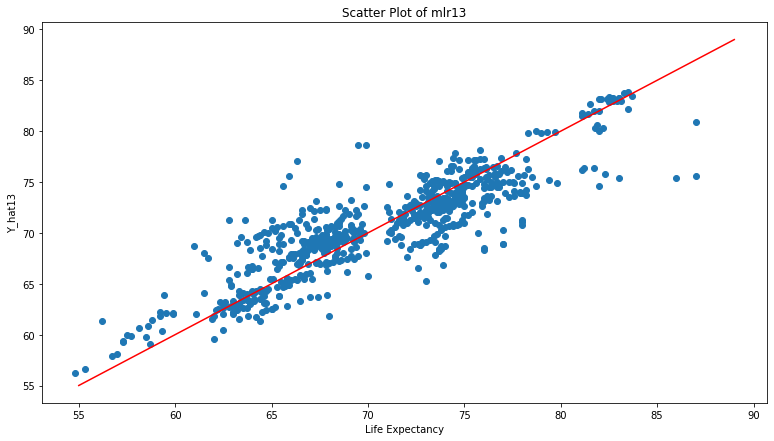

In [61]:
y = asia_data['Life_Expectancy']
y_hat13 = result_mlr13.predict(asia_data[['Schooling','Adult_Mortality','Income_Composition_Of_Resources','Diphtheria','Status',
                                        'Alcohol']])

# 시각화
plt.figure(figsize=(13,7))

plt.scatter(y, y_hat13, marker='o')
x = np.arange(55, 90)
plt.plot(x,x, 'red')
plt.xlabel('Life Expectancy')
plt.ylabel('Y_hat13')
plt.title('Scatter Plot of mlr13')


#### mlr14 : HIV_AIDS 변수 추가

In [62]:
result_mlr14 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Composition_Of_Resources + Diphtheria + Status + Alcohol + HIV_AIDS', data=asia_data).fit()
result_mlr14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     303.2
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          1.14e-199
Time:                        15:20:27   Log-Likelihood:                -1593.4
No. Observations:                 656   AIC:                             3203.
Df Residuals:                     648   BIC:                             3239.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          60.5934      1.175     51.587      0.000      58.287      62.900
Schooling                           0.4796      0.088      5.438      0.000       0.306       0.653
Adult_Mortality                    -0.0281      0.002    -16.256      0.000      -0.031      -0.025
Income_Composition_Of_Resources    10.6569      1.310      8.136      0.000       8.085      13.229
Diphtheria                          0.0667      0.010      6.946      0.000       0.048       0.086
Status                             -4.5740      0.547     -8.355      0.000      -5.649      -3.499
Alcohol                             0.2193      0.051      4.339      0.000       0.120       0.319
HIV_AIDS                           -1.4520      0.593     -2.447      0.015      -2.617      -0.287
==============================================================================
Omnibus:                       29.230   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.289
Skew:                           0.019   Prob(JB):                     4.98e-19
Kurtosis:                       4.756   Cond. No.                     2.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**공선성 경고를 확인하기 위해 VIF 지수 확인**

In [63]:
y, X = dmatrices('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Composition_Of_Resources + Diphtheria + Status + Alcohol + HIV_AIDS', asia_data, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,118.576165,Intercept
1,2.953250,Schooling
2,1.357320,Adult_Mortality
3,2.919372,Income_Composition_Of_Resources
4,1.471323,Diphtheria
5,1.195295,Status
6,1.194424,Alcohol
7,1.101818,HIV_AIDS


=> 다중공선성 문제 없음

#### mlr14_Scatter Plot

Text(0.5, 1.0, 'Scatter Plot of mlr14')

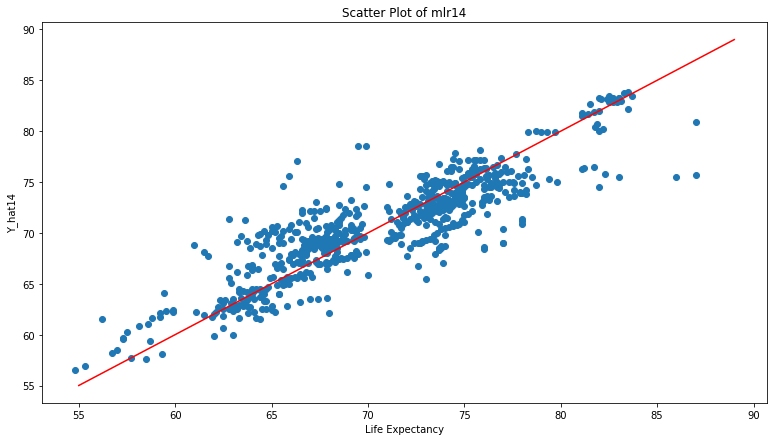

In [64]:
y = asia_data['Life_Expectancy']
y_hat14 = result_mlr14.predict(asia_data[['Schooling','Adult_Mortality','Income_Composition_Of_Resources','Diphtheria','Status',
                                        'Alcohol','HIV_AIDS']])

# 시각화
plt.figure(figsize=(13,7))

plt.scatter(y, y_hat14, marker='o')
x = np.arange(55, 90)
plt.plot(x,x, 'red')
plt.xlabel('Life Expectancy')
plt.ylabel('Y_hat14')
plt.title('Scatter Plot of mlr14')


#### mlr15 : Measles 변수 추가

In [65]:
result_mlr15 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Composition_Of_Resources + Diphtheria + Status + Alcohol + HIV_AIDS + Measles', data=asia_data).fit()
result_mlr15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     265.1
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          1.60e-198
Time:                        15:20:28   Log-Likelihood:                -1593.2
No. Observations:                 656   AIC:                             3204.
Df Residuals:                     647   BIC:                             3245.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          60.9776      1.293     47.162      0.000      58.439      63.516
Schooling                           0.4596      0.093      4.966      0.000       0.278       0.641
Adult_Mortality                    -0.0281      0.002    -16.265      0.000      -0.032      -0.025
Income_Composition_Of_Resources    10.7462      1.316      8.164      0.000       8.162      13.331
Diphtheria                          0.0654      0.010      6.669      0.000       0.046       0.085
Status                             -4.5880      0.548     -8.372      0.000      -5.664      -3.512
Alcohol                             0.2263      0.051      4.394      0.000       0.125       0.327
HIV_AIDS                           -1.4228      0.595     -2.392      0.017      -2.591      -0.255
Measles                            -0.0002      0.000     -0.712      0.476      -0.001       0.000
==============================================================================
Omnibus:                       29.122   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.901
Skew:                          -0.003   Prob(JB):                     6.04e-19
Kurtosis:                       4.752   Cond. No.                     7.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=> Measles 변수의 계수가 유의하지 않다. R제곱 값은 감소하고 AIC, BIC값은 증가한다. 따라서 Measles 변수는 모형에서 제거한다. (mlr14로 돌아감)

#### mlr16: Status : Schooling 교호작용 확인

In [66]:
result_mlr16 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Composition_Of_Resources + Diphtheria + Status + Alcohol + HIV_AIDS + Status:Schooling', data=asia_data).fit()
result_mlr16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     264.9
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          2.05e-198
Time:                        15:20:28   Log-Likelihood:                -1593.4
No. Observations:                 656   AIC:                             3205.
Df Residuals:                     647   BIC:                             3245.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          59.9636      7.460      8.038      0.000      45.314      74.613
Schooling                           0.5226      0.512      1.021      0.307      -0.482       1.527
Adult_Mortality                    -0.0281      0.002    -16.244      0.000      -0.031      -0.025
Income_Composition_Of_Resources    10.6598      1.311      8.130      0.000       8.085      13.235
Diphtheria                          0.0668      0.010      6.930      0.000       0.048       0.086
Status                             -3.9413      7.422     -0.531      0.596     -18.516      10.633
Alcohol                             0.2189      0.051      4.309      0.000       0.119       0.319
HIV_AIDS                           -1.4525      0.594     -2.446      0.015      -2.619      -0.287
Status:Schooling                   -0.0438      0.513     -0.085      0.932      -1.051       0.963
==============================================================================
Omnibus:                       29.251   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.377
Skew:                           0.019   Prob(JB):                     4.76e-19
Kurtosis:                       4.757   Cond. No.                     1.76e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=> Status와 Schooling의 교호작용을 추가하면 계수도 유의하지 않고 R제곱값이 감소하고 AIC, BIC값이 증가한다. 

#### mlr17: Status : Adult_Mortality 교호작용 확인

In [67]:
result_mlr17 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Composition_Of_Resources + Diphtheria + Status + Alcohol + HIV_AIDS + Status:Adult_Mortality', data=asia_data).fit()
result_mlr17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     265.2
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          1.50e-198
Time:                        15:20:28   Log-Likelihood:                -1593.1
No. Observations:                 656   AIC:                             3204.
Df Residuals:                     647   BIC:                             3245.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          59.5042      1.808     32.906      0.000      55.953      63.055
Schooling                           0.4800      0.088      5.441      0.000       0.307       0.653
Adult_Mortality                    -0.0129      0.019     -0.675      0.500      -0.051       0.025
Income_Composition_Of_Resources    10.6395      1.310      8.120      0.000       8.067      13.213
Diphtheria                          0.0668      0.010      6.946      0.000       0.048       0.086
Status                             -3.4619      1.507     -2.298      0.022      -6.420      -0.503
Alcohol                             0.2173      0.051      4.293      0.000       0.118       0.317
HIV_AIDS                           -1.4454      0.594     -2.435      0.015      -2.611      -0.280
Status:Adult_Mortality             -0.0152      0.019     -0.792      0.428      -0.053       0.023
==============================================================================
Omnibus:                       29.591   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.128
Skew:                           0.017   Prob(JB):                     1.98e-19
Kurtosis:                       4.775   Cond. No.                     5.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=> Status와 Adult_mortality의 교호작용을 추가하면 계수도 유의하지 않고 R제곱값이 감소하고 AIC, BIC값이 증가한다. 

#### mlr18: Status : Income 교호작용 확인

In [68]:
result_mlr18 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Composition_Of_Resources + Diphtheria + Status + Alcohol + HIV_AIDS + Status:Income_Composition_Of_Resources', data=asia_data).fit()
result_mlr18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     264.8
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          2.05e-198
Time:                        15:20:28   Log-Likelihood:                -1593.4
No. Observations:                 656   AIC:                             3205.
Df Residuals:                     647   BIC:                             3245.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 59.7872     13.150      4.546      0.000      33.965      85.609
Schooling                                  0.4790      0.089      5.401      0.000       0.305       0.653
Adult_Mortality                           -0.0281      0.002    -16.243      0.000      -0.031      -0.025
Income_Composition_Of_Resources           11.5874     15.175      0.764      0.445     -18.211      41.385
Diphtheria                                 0.0668      0.010      6.935      0.000       0.048       0.086
Status                                    -3.7647     13.161     -0.286      0.775     -29.608      22.079
Alcohol                                    0.2194      0.051      4.336      0.000       0.120       0.319
HIV_AIDS                                  -1.4526      0.594     -2.446      0.015      -2.619      -0.287
Status:Income_Composition_Of_Resources    -0.9293     15.099     -0.062      0.951     -30.579      28.720
==============================================================================
Omnibus:                       29.245   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.356
Skew:                           0.019   Prob(JB):                     4.81e-19
Kurtosis:                       4.756   Cond. No.                     4.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=> Status와 Income의 교호작용을 추가하면 계수도 유의하지 않고 R제곱값이 감소하고 AIC, BIC값이 증가한다. 

#### mlr19: Status : Diphtheria 교호작용 확인

In [69]:
result_mlr19 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Composition_Of_Resources + Diphtheria + Status + Alcohol + HIV_AIDS + Status:Diphtheria', data=asia_data).fit()
result_mlr19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     264.9
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          1.98e-198
Time:                        15:20:28   Log-Likelihood:                -1593.4
No. Observations:                 656   AIC:                             3205.
Df Residuals:                     647   BIC:                             3245.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          66.3409     20.700      3.205      0.001      25.693     106.989
Schooling                           0.4796      0.088      5.434      0.000       0.306       0.653
Adult_Mortality                    -0.0281      0.002    -16.244      0.000      -0.031      -0.025
Income_Composition_Of_Resources    10.6554      1.311      8.129      0.000       8.082      13.229
Diphtheria                          0.0070      0.215      0.033      0.974      -0.415       0.429
Status                            -10.3298     20.703     -0.499      0.618     -50.984      30.324
Alcohol                             0.2192      0.051      4.333      0.000       0.120       0.319
HIV_AIDS                           -1.4512      0.594     -2.444      0.015      -2.617      -0.285
Status:Diphtheria                   0.0598      0.215      0.278      0.781      -0.363       0.482
==============================================================================
Omnibus:                       29.216   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.224
Skew:                           0.018   Prob(JB):                     5.14e-19
Kurtosis:                       4.755   Cond. No.                     5.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=> Status와 Diphtheria의 교호작용을 추가하면 계수도 유의하지 않고 R제곱값이 감소하고 AIC, BIC값이 증가한다. 

#### mlr20 : Status : Alcohol 교호작용 확인

In [70]:
result_mlr20 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Composition_Of_Resources + Diphtheria + Status + Alcohol + HIV_AIDS + Status:Alcohol', data=asia_data).fit()
result_mlr20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     265.2
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          1.44e-198
Time:                        15:20:28   Log-Likelihood:                -1593.1
No. Observations:                 656   AIC:                             3204.
Df Residuals:                     647   BIC:                             3245.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          61.2482      1.406     43.564      0.000      58.487      64.009
Schooling                           0.4803      0.088      5.445      0.000       0.307       0.654
Adult_Mortality                    -0.0281      0.002    -16.262      0.000      -0.031      -0.025
Income_Composition_Of_Resources    10.6270      1.311      8.109      0.000       8.054      13.200
Diphtheria                          0.0662      0.010      6.881      0.000       0.047       0.085
Status                             -5.1957      0.915     -5.678      0.000      -6.993      -3.399
Alcohol                             0.0835      0.168      0.497      0.619      -0.246       0.413
HIV_AIDS                           -1.4589      0.593     -2.458      0.014      -2.624      -0.294
Status:Alcohol                      0.1486      0.175      0.848      0.397      -0.196       0.493
==============================================================================
Omnibus:                       29.093   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.758
Skew:                           0.001   Prob(JB):                     6.49e-19
Kurtosis:                       4.751   Cond. No.                     2.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=> Status와 Alcohol의 교호작용을 추가하면 계수도 유의하지 않고 R제곱값이 감소하고 AIC, BIC값이 증가한다.

#### mlr21 : Status : HIV_AIDS 교호작용 확인

In [71]:
result_mlr21 = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Composition_Of_Resources + Diphtheria + Status + Alcohol + HIV_AIDS + Status:HIV_AIDS', data=asia_data).fit()
result_mlr21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     303.2
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          1.14e-199
Time:                        15:20:28   Log-Likelihood:                -1593.4
No. Observations:                 656   AIC:                             3203.
Df Residuals:                     648   BIC:                             3239.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          60.1989      1.162     51.825      0.000      57.918      62.480
Schooling                           0.4796      0.088      5.438      0.000       0.306       0.653
Adult_Mortality                    -0.0281      0.002    -16.256      0.000      -0.031      -0.025
Income_Composition_Of_Resources    10.6569      1.310      8.136      0.000       8.085      13.229
Diphtheria                          0.0667      0.010      6.946      0.000       0.048       0.086
Status                             -4.1795      0.542     -7.718      0.000      -5.243      -3.116
Alcohol                             0.2193      0.051      4.339      0.000       0.120       0.319
HIV_AIDS                            2.4929      0.297      8.408      0.000       1.911       3.075
Status:HIV_AIDS                    -3.9449      0.316    -12.496      0.000      -4.565      -3.325
==============================================================================
Omnibus:                       29.230   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.289
Skew:                           0.019   Prob(JB):                     4.98e-19
Kurtosis:                       4.756   Cond. No.                     1.79e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.61e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

=> 교호작용항을 포함하여 모든 변수의 계수가 유의하고 R 제곱값과 AIC, BIC값이 유지된다.

### 최종회귀모형
최종회귀모형으로 mlr14 선택

In [75]:
result = smf.ols('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Composition_Of_Resources + Diphtheria + Status + Alcohol + HIV_AIDS', data=asia_data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     303.2
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          1.14e-199
Time:                        15:27:37   Log-Likelihood:                -1593.4
No. Observations:                 656   AIC:                             3203.
Df Residuals:                     648   BIC:                             3239.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          60.5934      1.175     51.587      0.000      58.287      62.900
Schooling                           0.4796      0.088      5.438      0.000       0.306       0.653
Adult_Mortality                    -0.0281      0.002    -16.256      0.000      -0.031      -0.025
Income_Composition_Of_Resources    10.6569      1.310      8.136      0.000       8.085      13.229
Diphtheria                          0.0667      0.010      6.946      0.000       0.048       0.086
Status                             -4.5740      0.547     -8.355      0.000      -5.649      -3.499
Alcohol                             0.2193      0.051      4.339      0.000       0.120       0.319
HIV_AIDS                           -1.4520      0.593     -2.447      0.015      -2.617      -0.287
==============================================================================
Omnibus:                       29.230   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.289
Skew:                           0.019   Prob(JB):                     4.98e-19
Kurtosis:                       4.756   Cond. No.                     2.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 최종 모델 가정 확인

In [76]:
final_var = ['Life_Expectancy', 'Schooling', 'Adult_Mortality',
             'Income_Composition_Of_Resources', 'Diphtheria', 'Status',
             'Alcohol', 'HIV_AIDS']

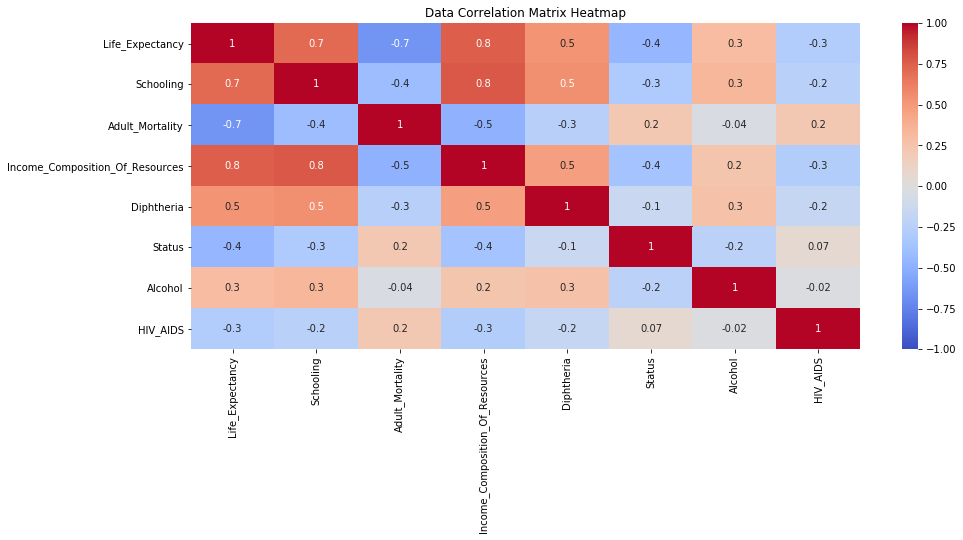

In [77]:
# 선형성
plt.figure(figsize=(15,6))
sns.heatmap(asia_data[final_var].corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.title('Data Correlation Matrix Heatmap')
plt.show()

In [78]:
# 다중공선성
y, X = dmatrices('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Composition_Of_Resources + Diphtheria + Status + Alcohol + HIV_AIDS', asia_data, return_type = 'dataframe')

vif = pd.DataFrame()
vif["features"] = X.columns 
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,features,VIF Factor
0,Intercept,118.576165
1,Schooling,2.953250
2,Adult_Mortality,1.357320
3,Income_Composition_Of_Resources,2.919372
4,Diphtheria,1.471323
5,Status,1.195295
6,Alcohol,1.194424
7,HIV_AIDS,1.101818


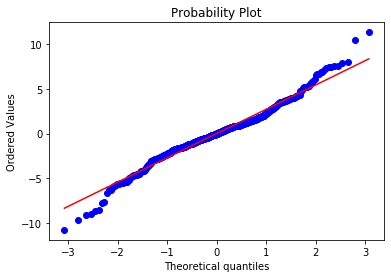

In [79]:
# 정규성
resid = result.resid

stats.probplot(resid,plot=plt)
plt.show()

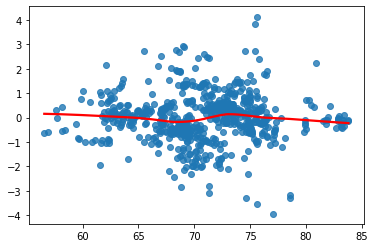

In [82]:
# 등분산성
fitted = result.predict(asia_data)
sns.regplot(fitted, stats.zscore(resid),lowess = True, line_kws={'color' : 'red'})

plt.show()

#### 회귀모형 예측력

Text(0.5, 1.0, 'Scatter Plot of Life_expectancy')

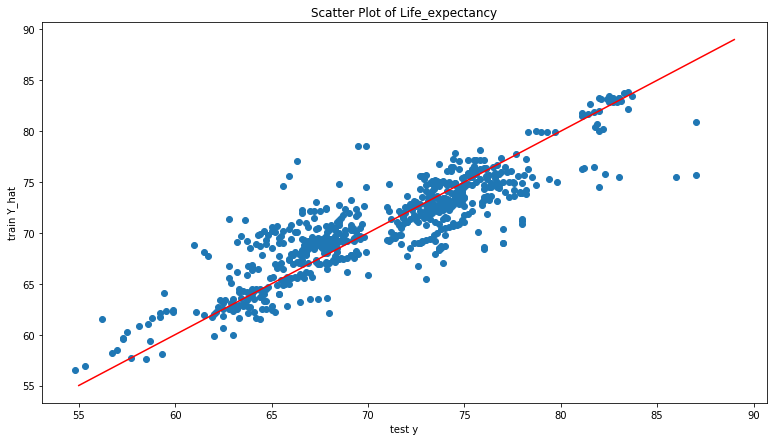

In [85]:
y = asia_data['Life_Expectancy']
y_hat = result.predict(asia_data[['Schooling','Adult_Mortality','Income_Composition_Of_Resources','Diphtheria','Status',
                                        'Alcohol','HIV_AIDS']])

# 시각화
plt.figure(figsize=(13,7))

plt.scatter(y, y_hat, marker='o')
x = np.arange(55, 90)
plt.plot(x,x, 'red')
plt.xlabel('test y')
plt.ylabel('train Y_hat')
plt.title('Scatter Plot of Life_expectancy')

In [88]:
mse = mean_squared_error(y_true = asia_data['Life_Expectancy'], y_pred = result.predict(asia_data[final_var]))
print('mse =', mse) 

rmse= np.sqrt(mse)
print("rmse =",rmse)

y_true = asia_data["Life_Expectancy"]
y_pred = result.predict(asia_data[final_var])

def MAE(y_true, y_pred): 
    print ("mae =", np.mean(np.abs((y_true - y_pred))))

MAE(y_true, y_pred)

mse = 7.5396726762884745
rmse = 2.7458464407698537
mae = 2.012720786189672
